## ***1. Know Your Data***

### Import Libraries

In [177]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Dataset Loading

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
# Load Dataset
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Innomatics research Labs/laptop_details.csv')

### Dataset First View

In [180]:
# Dataset First Look
raw_data.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


### Dataset Rows & Columns count

In [181]:
# Dataset Rows & Columns count
raw_data.shape

(720, 4)

### Dataset Information

In [182]:
# Dataset Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


#### Missing Values/Null Values

In [183]:
# Missing Values/Null Values Count
raw_data.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

## ***2. Understanding Your Variables***

In [184]:
# Dataset Columns
raw_data.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [185]:
# Dataset Describe
raw_data.describe(include='all')

,Product,Rating,MRP,Feature
count,720,581.000000,720,720
unique,410,NaN,251,394
top,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,"₹39,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
freq,31,NaN,61,30
mean,NaN,4.321170,NaN,NaN
std,NaN,0.282872,NaN,NaN
min,NaN,3.000000,NaN,NaN
25%,NaN,4.200000,NaN,NaN
50%,NaN,4.300000,NaN,NaN
75%,NaN,4.500000,NaN,NaN


### Check Unique Values for each variable.

In [186]:
# Check Unique Values for each variable.
raw_data.nunique()

Product    410
Rating      18
MRP        251
Feature    394
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [187]:
df = raw_data.copy()

In [188]:
# Write your code to make your dataset analysis ready.
# Processor Information

regex = r'(?:AMD|Intel|M\d|Qualcomm)[\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [189]:
regex = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [190]:
# OS 
regex = r'\d{1,2} bit Windows \d{1,2} Operating System|Windows \d{1,2} Operating System|Chrome Operating System|Mac OS Operating System|\d{1,2} bit DOS Operating System|DOS Operating System'
# regex = r'(?:\d+ bit )?Windows \d+ Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [191]:
# Storage

regex = r'\d+\s?(?:GB|TB)\s(?:SSD|HDD|EMMC Storage)'

df['Storage'] = df['Product'].apply(lambda x : re.findall(regex, x))

In [192]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))

In [193]:
#size /Display

# regex = r'\((\d{2}\.?\d?\d?(?:\s|-)*[iI]nch)\)'
regex = r'\d+(?:\.\d+)?\s?(?:[iI]nch|inches)'
df['Display'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
 9   Display    720 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.4+ KB


In [195]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[Lenovo],[14 inch]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[Lenovo],[15.6 inch]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[ASUS],[15.6 inch]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP],[15.6 inch]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS],[15.6 inch]


In [196]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
df.Display = df.Display.apply(lambda x : ''.join(x))

In [197]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [198]:
df.nunique()

Product      410
Rating        18
MRP          251
Feature      394
Processor     26
RAM           19
OS            10
Storage       13
Brand         16
Display       28
dtype: int64

In [199]:
df.describe()

,Rating,MRP
count,581.000000,720.000000
mean,4.321170,81605.837500
std,0.282872,61552.955102
min,3.000000,14990.000000
25%,4.200000,38996.750000
50%,4.300000,59990.000000
75%,4.500000,95240.000000
max,5.000000,434830.000000


In [200]:
df['Processor'] = df['Processor'].replace({'Intel Evo Core i5 ProcessorIntel Core i5 Processor':'Intel Core i5 Processor','Intel OptaneIntel Core i3 Processor':'Intel Core i3 Processor'})

In [201]:
df['Display'] = df['Display'].replace({'11.6 Inch':'11.6 inch','15.6 Inch':'15.6 inch','14 Inch':'14 inch','13.3 Inch':'13.3 inch','16 Inch':'16 inch','16.1 Inch':'16.1 inch','17.3 Inch':'17.3 inch','15.6 inch15.6 inch':'15.6 inch','14 inch14 inch':'14 inch','':'14 inch','206015.6 inch15.6 inch':'15.6 inch'})

In [202]:
df['OS'] = df['OS'].replace({'Windows 10 Operating System64 bit Windows 10 Operating System':'64 bit Windows 10 Operating System','Windows 10 Operating System':'64 bit Windows 10 Operating System','Windows 11 Operating System':'64 bit Windows 11 Operating System'})

In [203]:
df['Touchscreen'] = df['Feature'].str.contains('Touchscreen')
df['Touchscreen'] = df['Touchscreen'].replace({True:'Yes', False:'No'})

In [204]:
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display,Touchscreen
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,14 inch,No
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,15.6 inch,No
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS,15.6 inch,No
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP,15.6 inch,No
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS,15.6 inch,No
...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,64 GB EMMC Storage,ASUS,11.6 inch,Yes
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,15.6 inch,No
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD,ASUS,15.6 inch,No
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS,14 inch,Yes


### What all manipulations have you done and insights you found?

The manipulations are:
1. Extract Out the information of processor, RAM, OS, Storage, Brand and Laptop_size and store eachc one in separate variable
2. Removed the ruppee sign and comma from MRP and change to float.
3. Added a new variable as touchscreen(the ones who has touch screen)

## ***4. EDA***

***MRP ( Univariate Plots)***

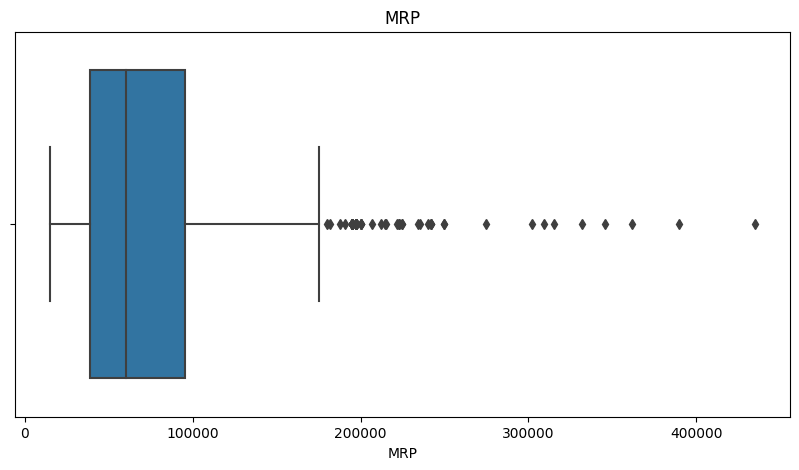

In [205]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MRP',data=df) 
plt.title('MRP')
plt.show()

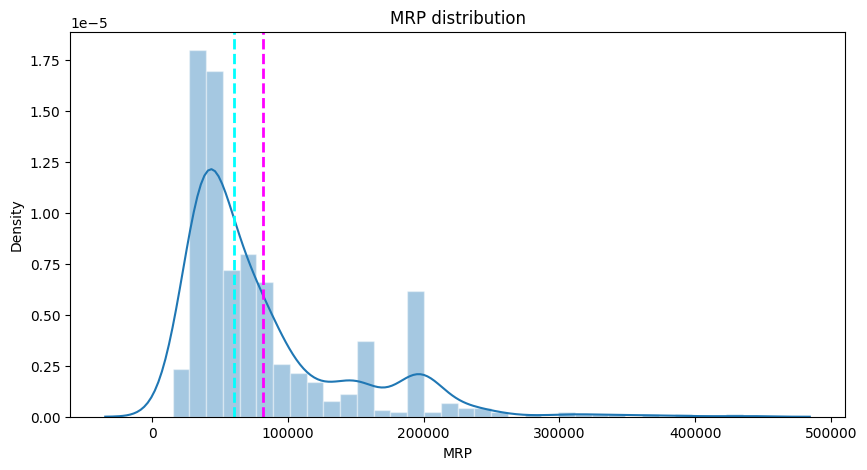

In [206]:
plt.figure(figsize=(10,5))
sns.histplot(
    df['MRP'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    )
plt.axvline(df['MRP'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['MRP'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('MRP distribution')
plt.show()

***Brand(Univariate Plots)***

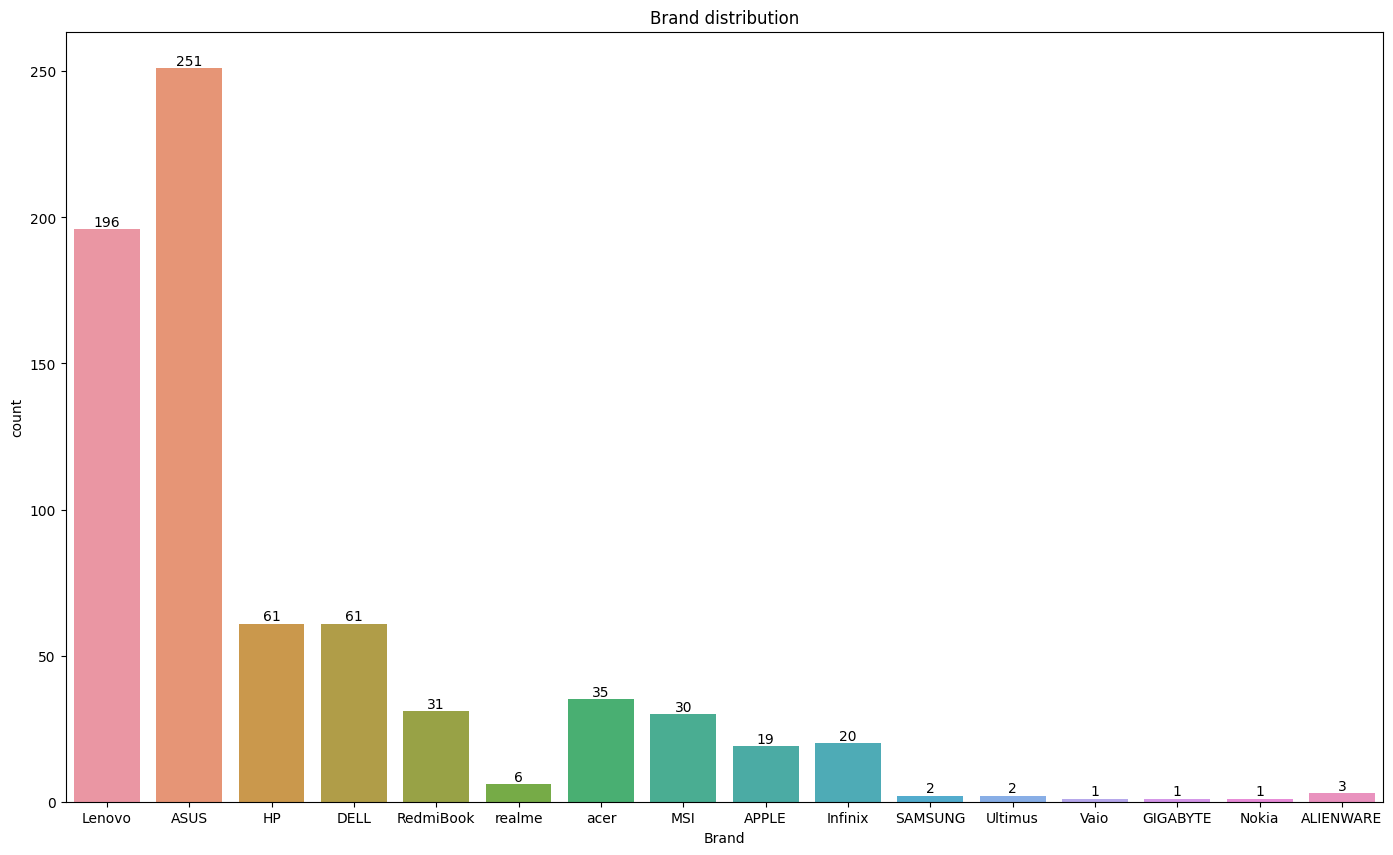

In [207]:
plt.figure(figsize=(17,10))
ax = sns.countplot(data=df, x='Brand')
plt.xlabel('Brand')
plt.title('Brand distribution')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
plt.show()

In brands, we can see that ASUS has the maximum number of laptop available in market whereas vaio, Gigabyte and nokia has only 1 product available in market

***Brand Vs MRP (Bivariate)***

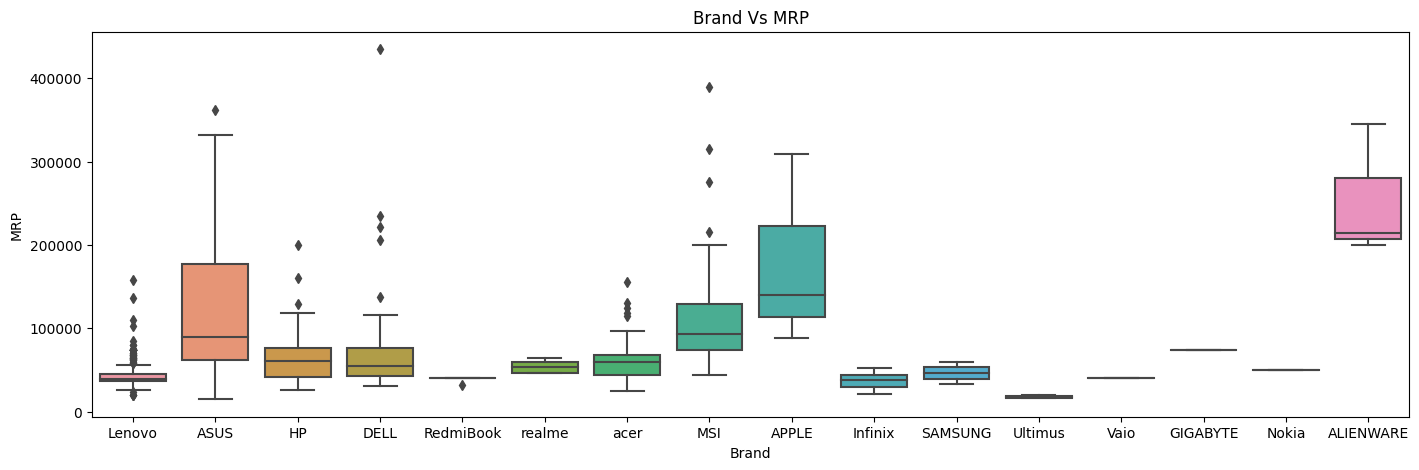

In [208]:
plt.figure(figsize=(17,5))
sns.boxplot(y=df['MRP'],x=df['Brand'],data=df) 
plt.xlabel('Brand')
plt.ylabel('MRP')
plt.title('Brand Vs MRP')
plt.show()

In [209]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
ALIENWARE  199990.0  345390.0  253390.000000
APPLE       88990.0  309490.0  162332.105263
ASUS        14990.0  361990.0  115667.589641
DELL        30428.0  434830.0   73660.688525
GIGABYTE    73990.0   73990.0   73990.000000
HP          25990.0  199990.0   65195.557377
Infinix     20990.0   52990.0   36890.000000
Lenovo      19490.0  157990.0   45454.709184
MSI         43990.0  389990.0  121963.966667
Nokia       50490.0   50490.0   50490.000000
RedmiBook   31990.0   39990.0   39731.935484
SAMSUNG     32990.0   59990.0   46490.000000
Ultimus     15990.0   19990.0   17990.000000
Vaio        40990.0   40990.0   40990.000000
acer        24990.0  155490.0   64314.742857
realme      46990.0   64999.0   54324.833333

The ASUS and Apple is distributed among varying price ranges while others having price ranges lower than 200000  while having some of their products above them.Overall, all brands are varying in price ranges

***Processor(Univariate)***

In [210]:
# Classified Each processor according too its importance
def fetch_processor(text):
    if text == 'Intel Core i3 Processor' or text == 'Intel Core i5 Processor' or text == 'Intel Core i7 Processor' or text == 'Intel Core i9 Processor' or text == 'AMD Ryzen 5 Hexa Core Processor' or text == 'AMD Ryzen 7 Octa Core Processor' or text == 'AMD Ryzen 9 Octa Core Processor' or text == 'AMD Ryzen 3 Dual Core Processor' or text == 'AMD Ryzen 5 Quad Core Processor':
        return text
    else:
        if text.split(' ')[0] == 'Intel':
            return 'Intel Other Processor'
        elif text.split(' ')[0] == 'AMD':
          return 'AMD Other Processor'
        elif text.split(' ')[0] == 'Qualcomm':
          return 'Qualcomm Snapdragon Processor'
        else:
            return 'Apple Processor'

In [211]:
df['Processor'] = df['Processor'].apply(fetch_processor)

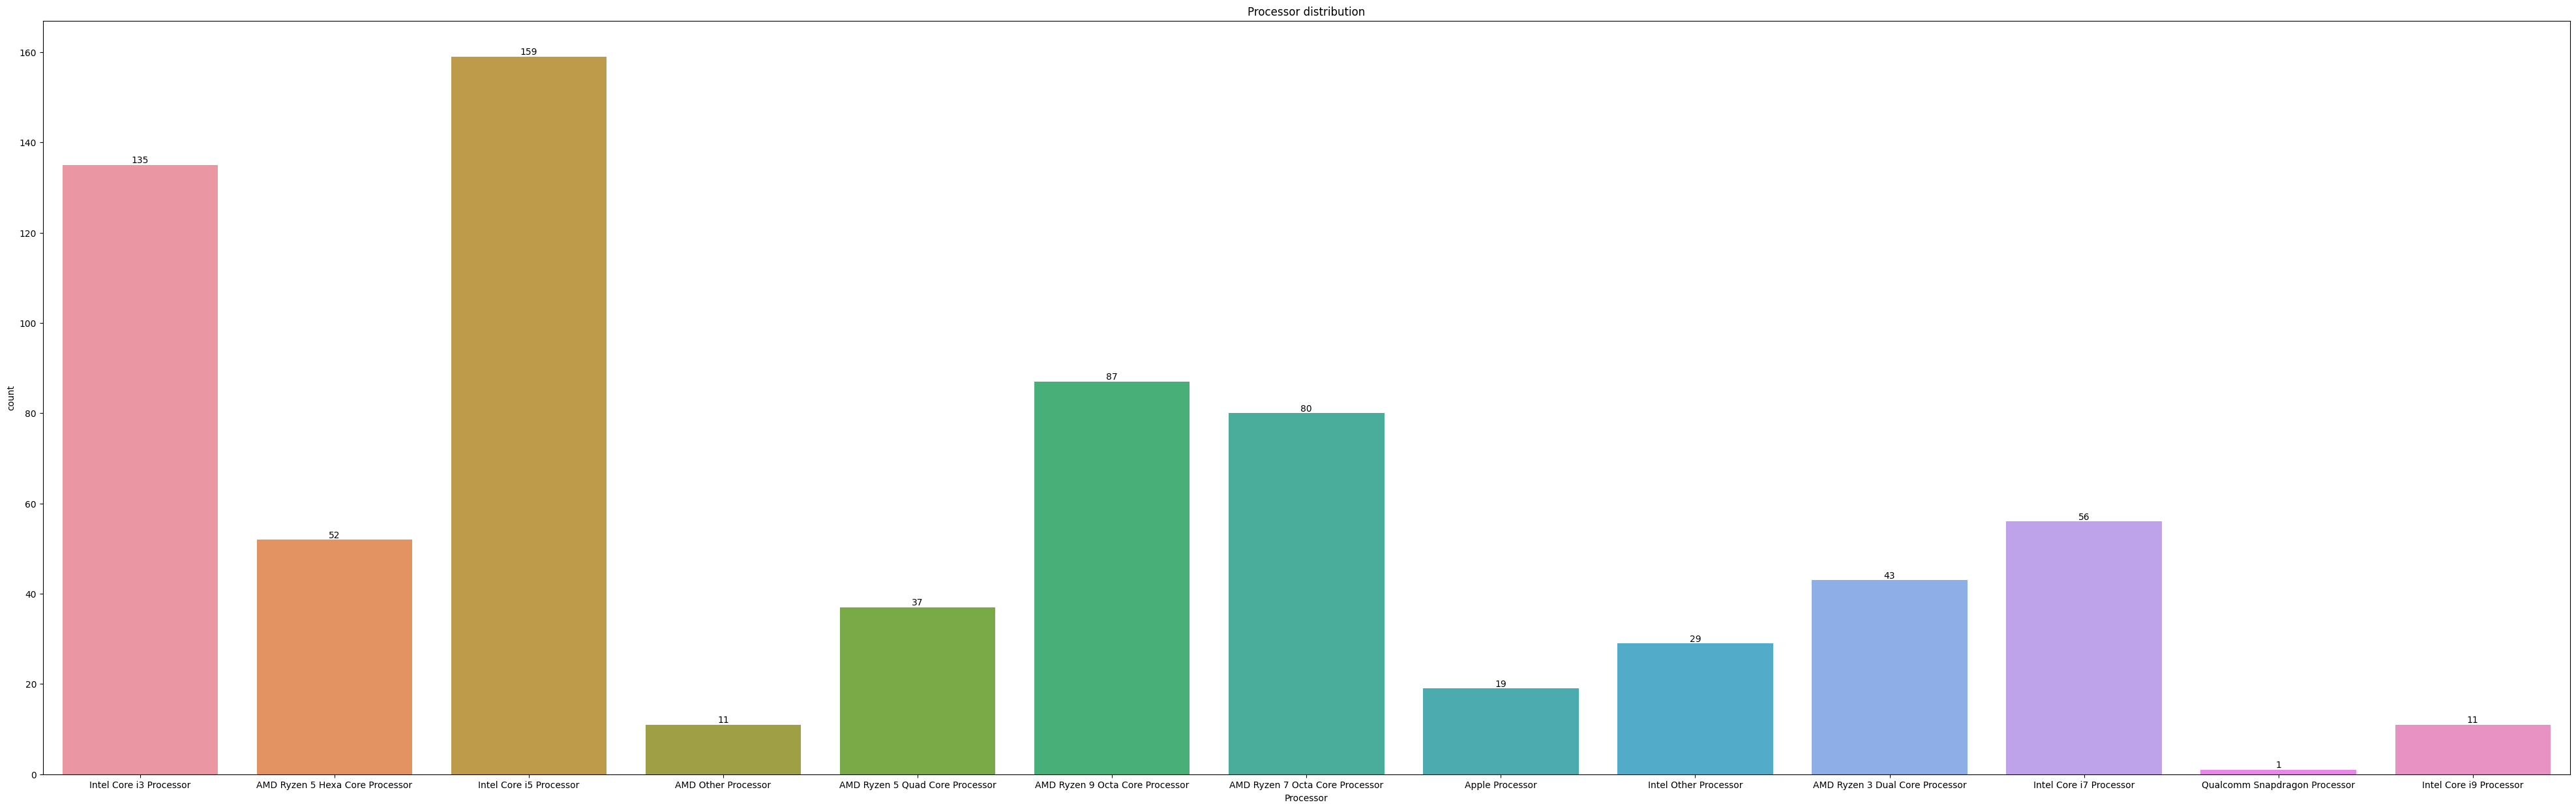

In [212]:
plt.figure(figsize=(50,15))
ax = sns.countplot(data=df, x='Processor')
plt.xlabel('Processor')
plt.title('Processor distribution')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
plt.show()

***MRP vs Processor (Bivariate)***

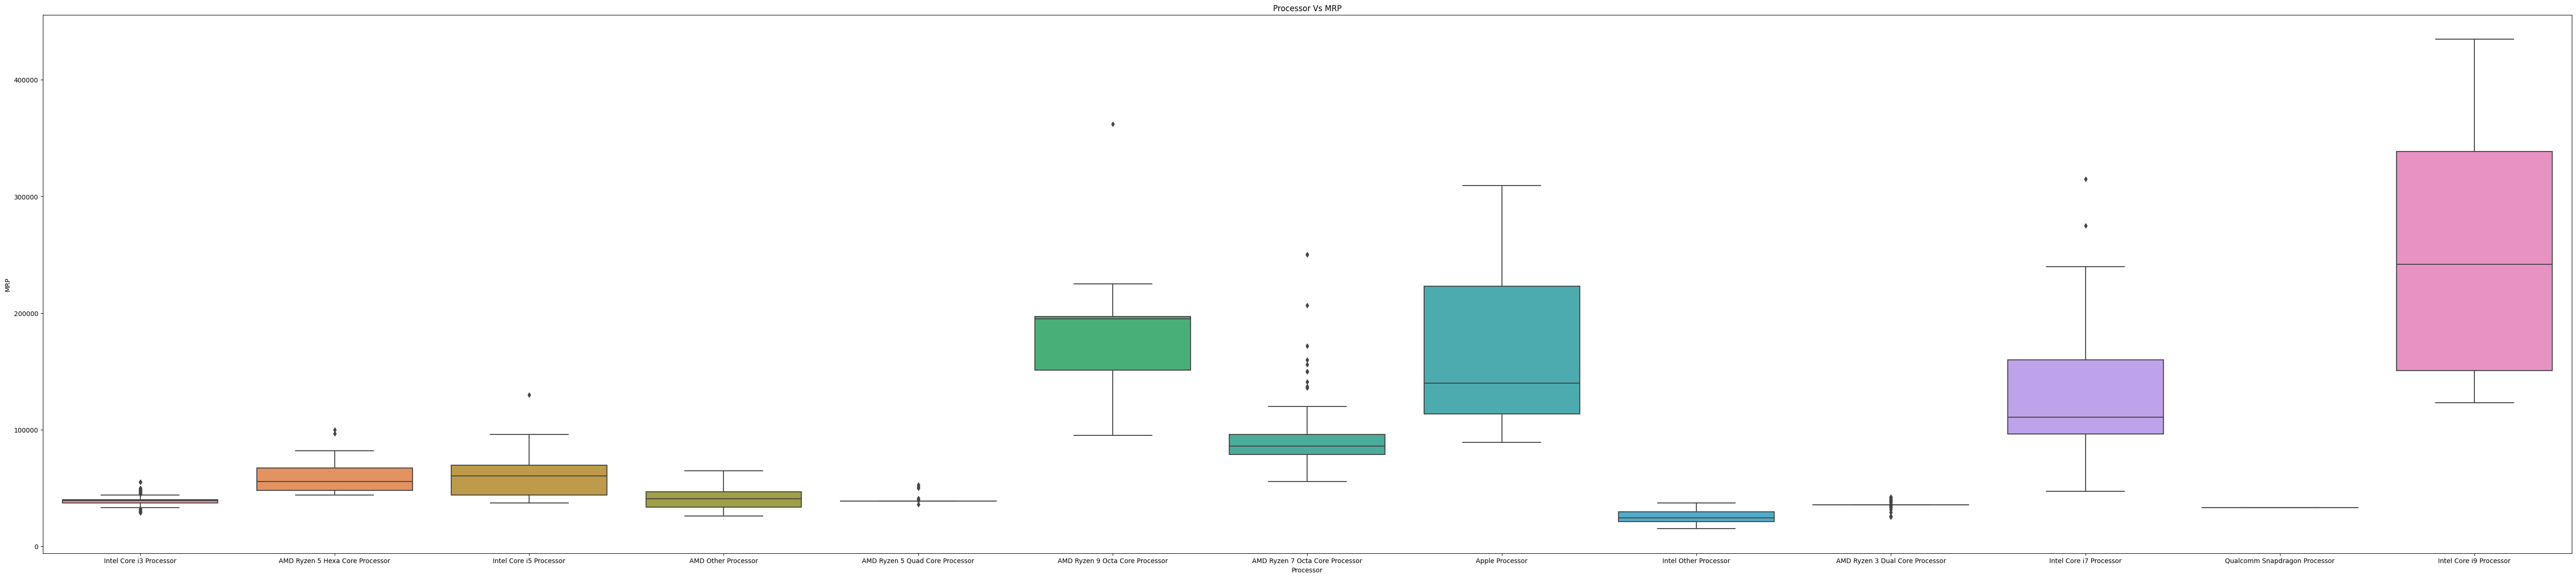

In [213]:
plt.figure(figsize=(70,15))
sns.boxplot(y=df['MRP'],x=df['Processor'],data=df) 
plt.xlabel('Processor')
plt.ylabel('MRP')
plt.title('Processor Vs MRP')
plt.show()

***Storage(Univariate)***

In [214]:
df['Storage'].value_counts()

512 GB SSD              375
1 TB SSD                176
256 GB SSD               98
1 TB HDD256 GB SSD       26
1 TB HDD                 17
64 GB EMMC Storage        7
2 TB SSD                  7
128 GB SSD                6
128 GB EMMC Storage       2
1 TB HDD512 GB SSD        2
1 TB HDD128 GB SSD        2
256 GB HDD256 GB SSD      1
32 GB EMMC Storage        1
Name: Storage, dtype: int64

In [215]:
# From storage we carry out SSD and HDD value and store in particular variables
regex_ssd = r'(\d+)\s*(TB|GB)\s*SSD'
regex_hdd =r'(\d+)\s*(TB|GB)\s*HDD'
regex_emmc = r'(\d+)\s*(TB|GB)\s*EMMC'
df['SSD'] = df['Storage'].apply(lambda x: [match[0] for match in re.findall(regex_ssd, x)])
df['HDD'] = df['Storage'].apply(lambda x: [match[0] for match in re.findall(regex_hdd, x)])
df['EMMC'] = df['Storage'].apply(lambda x: [match[0] for match in re.findall(regex_emmc, x)])

In [216]:
df.SSD = df.SSD.apply(lambda x : ''.join(x))
df.HDD = df.HDD.apply(lambda x : ''.join(x))
df.EMMC = df.EMMC.apply(lambda x : ''.join(x))

In [217]:
df['SSD'] = df['SSD'].replace({'1': '1000', '2': '2000','128128':'128','':'0'})
df['HDD'] = df['HDD'].replace({'1': '1000','':'0'})
df['EMMC'] = df['EMMC'].replace({'':'0'})

In [218]:
df['SSD'] = df['SSD'].astype(int)
df['HDD'] = df['HDD'].astype(int)
df['EMMC'] = df['EMMC'].astype(int)

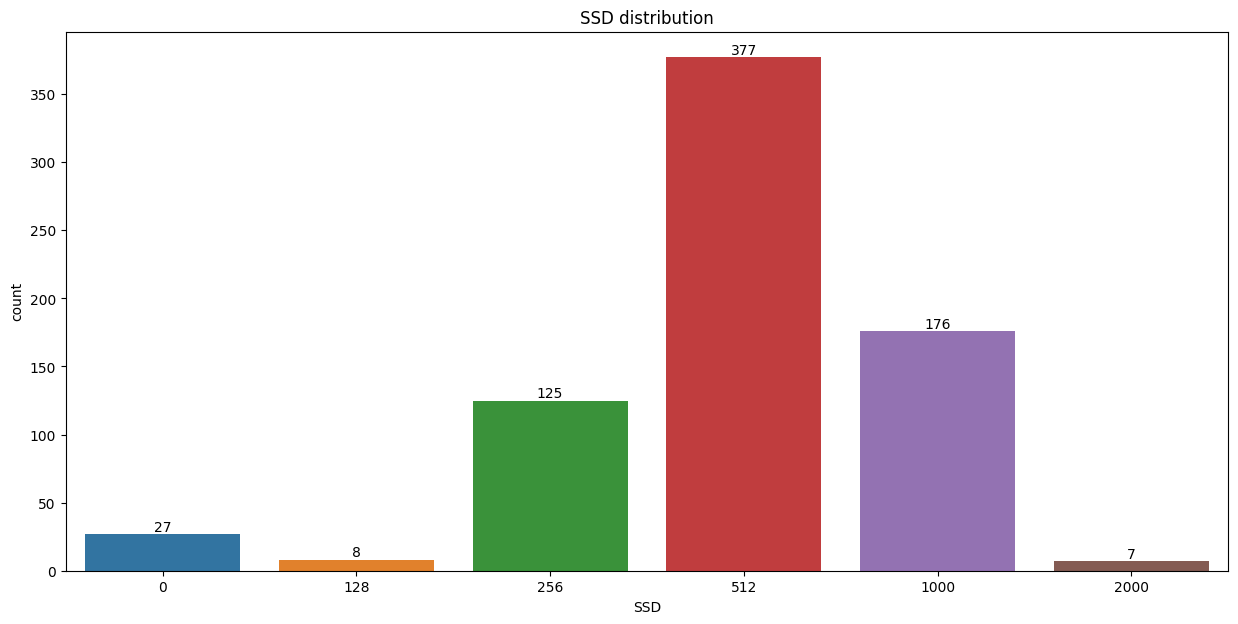

In [219]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df, x='SSD')
plt.xlabel('SSD')
plt.title('SSD distribution')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
plt.show()

***MRP Vs Storage(Bivariate)***

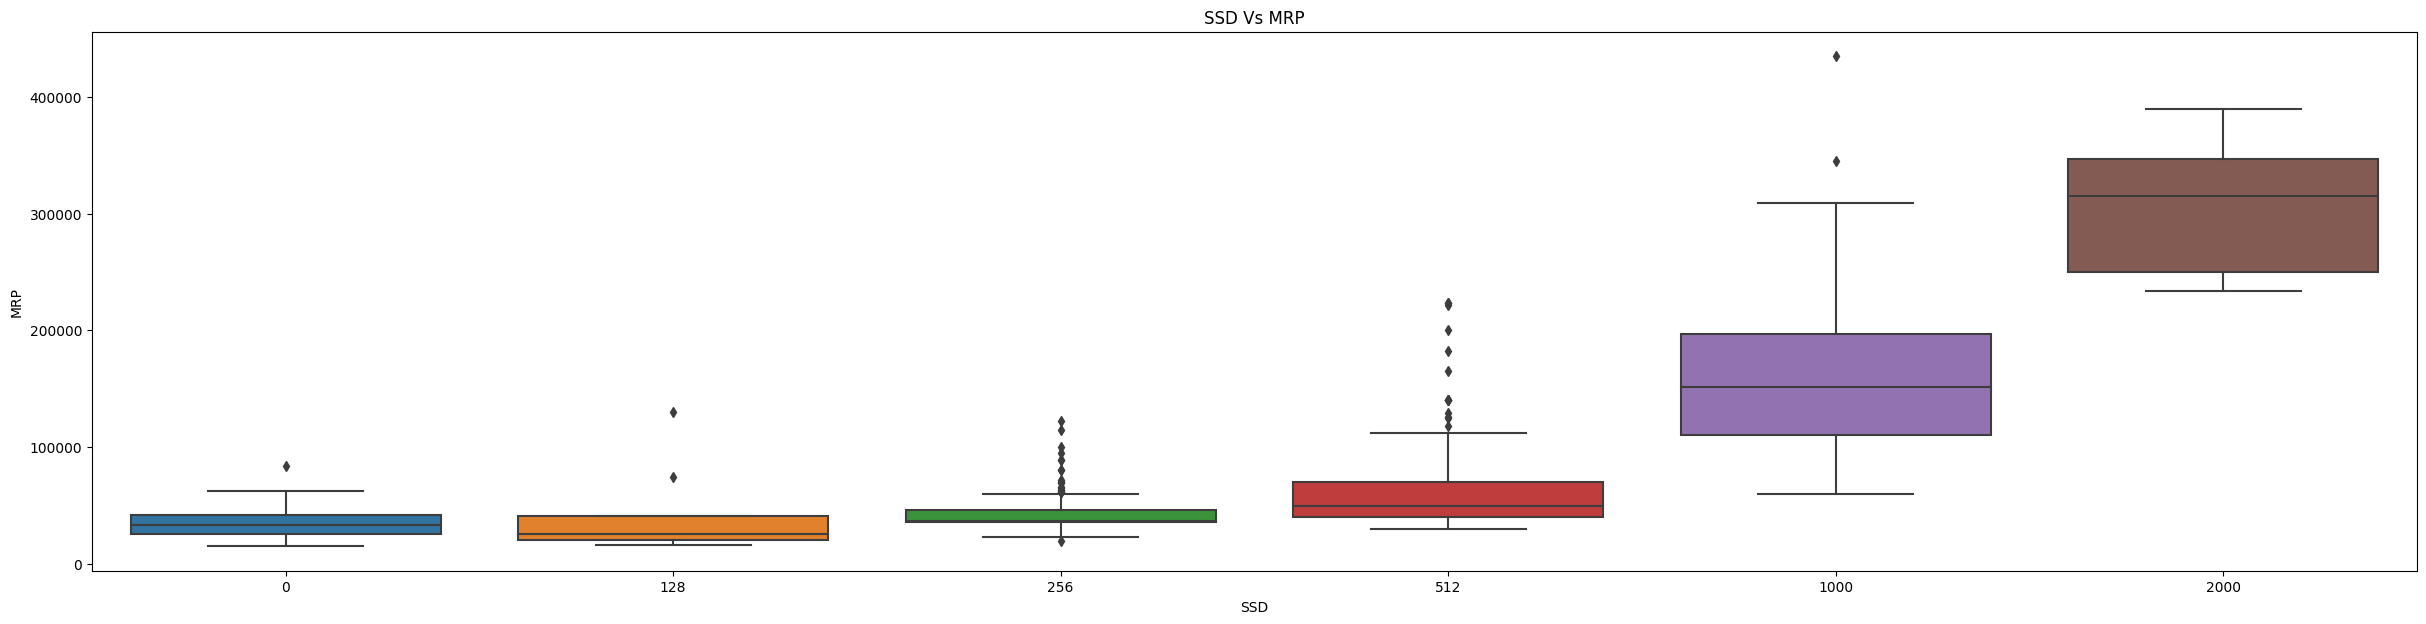

In [220]:
plt.figure(figsize=(30,7))
sns.boxplot(y=df['MRP'],x=df['SSD'],data=df) 
plt.xlabel('SSD')
plt.ylabel('MRP')
plt.title('SSD Vs MRP')
plt.show()

*** RAM(Univariate)***

In [221]:
# Change the ram from categorical to numerical/discrete variable
df["RAM"] = df['RAM'].apply(lambda x:" ".join(x.split()[0:1]))

In [222]:
df['RAM'] = df['RAM'].astype(int)

In [223]:
df["RAM"] = df["RAM"].replace(128,8)

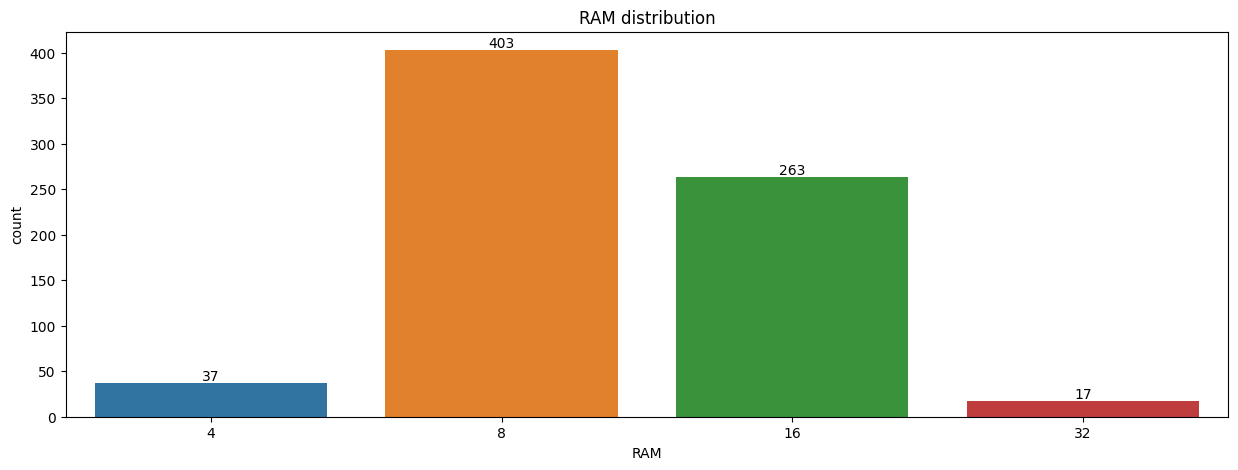

In [224]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='RAM')
plt.xlabel('RAM')
plt.title('RAM distribution')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
plt.show()

***RAM Vs MRP (Bivariate)***

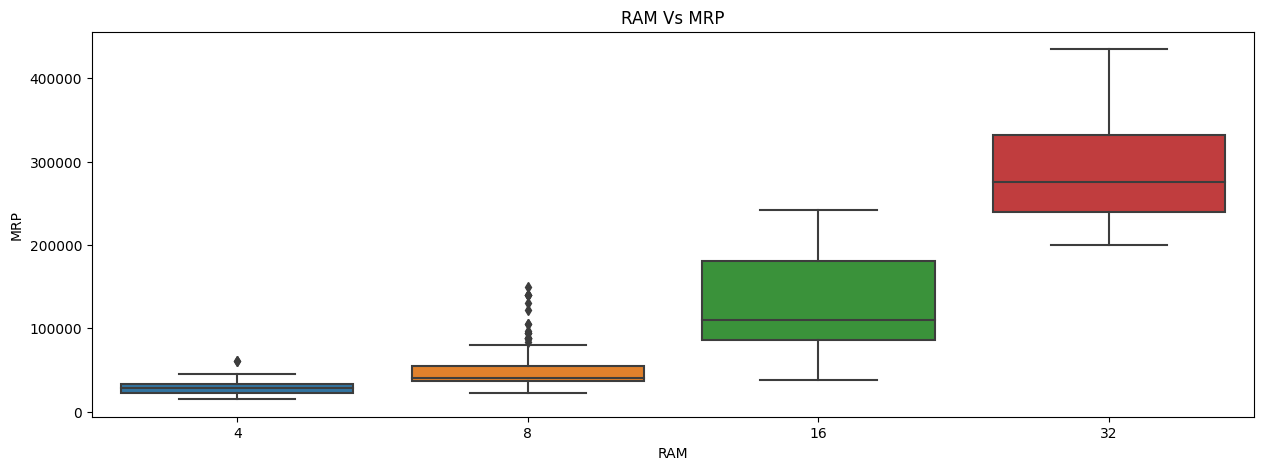

In [225]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df['MRP'],x=df['RAM'],data=df) 
plt.xlabel('RAM')
plt.ylabel('MRP')
plt.title('RAM Vs MRP')
plt.show()

In [226]:
df.groupby('RAM')['MRP'].mean()

RAM
4      29448.027027
8      48788.905707
16    125825.577947
32    288974.705882
Name: MRP, dtype: float64

***Display(Univariate)***

In [227]:
df["Display_size"] = df['Display'].apply(lambda x:" ".join(x.split()[0:1]))

In [228]:
df["Display_size"] = df["Display_size"].astype(float)

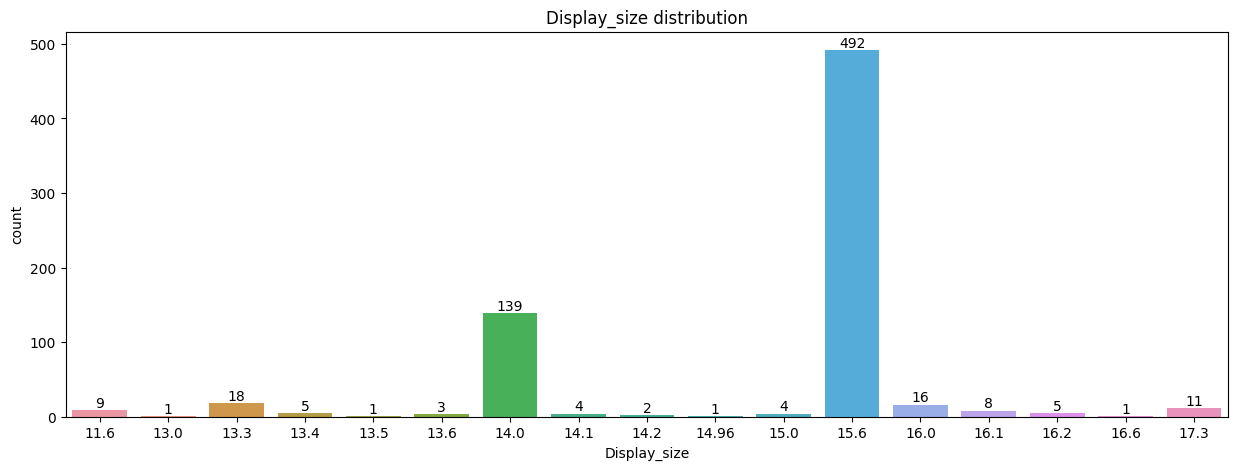

In [229]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Display_size')
plt.xlabel('Display_size')
plt.title('Display_size distribution')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
plt.show()

***Display Vs MRP (Bivariate)***

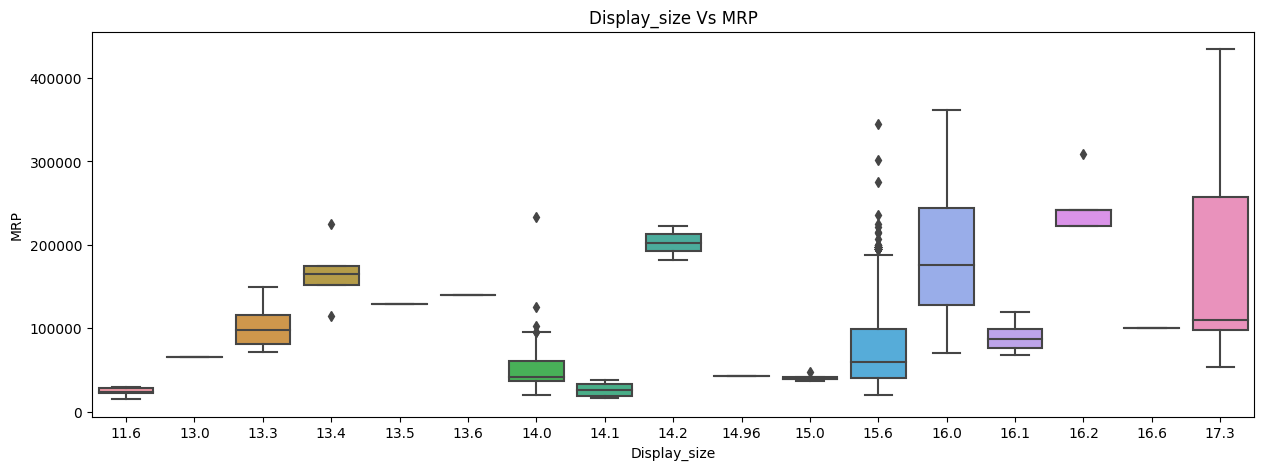

In [230]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df['MRP'],x=df['Display_size'],data=df) 
plt.xlabel('Display_size')
plt.ylabel('MRP')
plt.title('Display_size Vs MRP')
plt.show()

***Touchscreen(Univariate)***

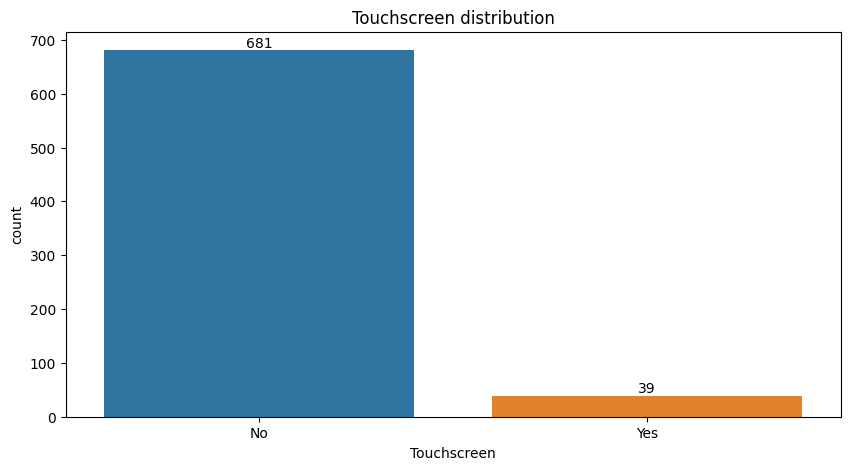

In [231]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Touchscreen')
plt.xlabel('Touchscreen')
plt.title('Touchscreen distribution')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
plt.show()

***Touchscreen Vs MRP (Bivariate)***

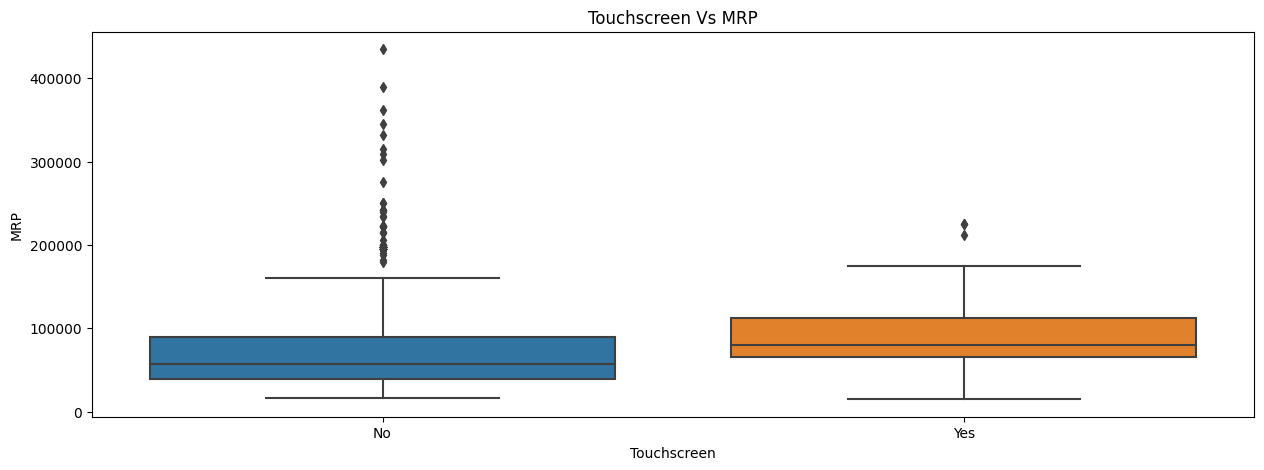

In [232]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df['MRP'],x=df['Touchscreen'],data=df) 
plt.xlabel('Touchscreen')
plt.ylabel('MRP')
plt.title('Touchscreen Vs MRP')
plt.show()

***Operating System(Univariate)***

In [233]:
df['OS'].unique()

array(['64 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System', 'Mac OS Operating System',
       'DOS Operating System', 'Chrome Operating System',
       '32 bit Windows 11 Operating System',
       '64 bit DOS Operating System'], dtype=object)

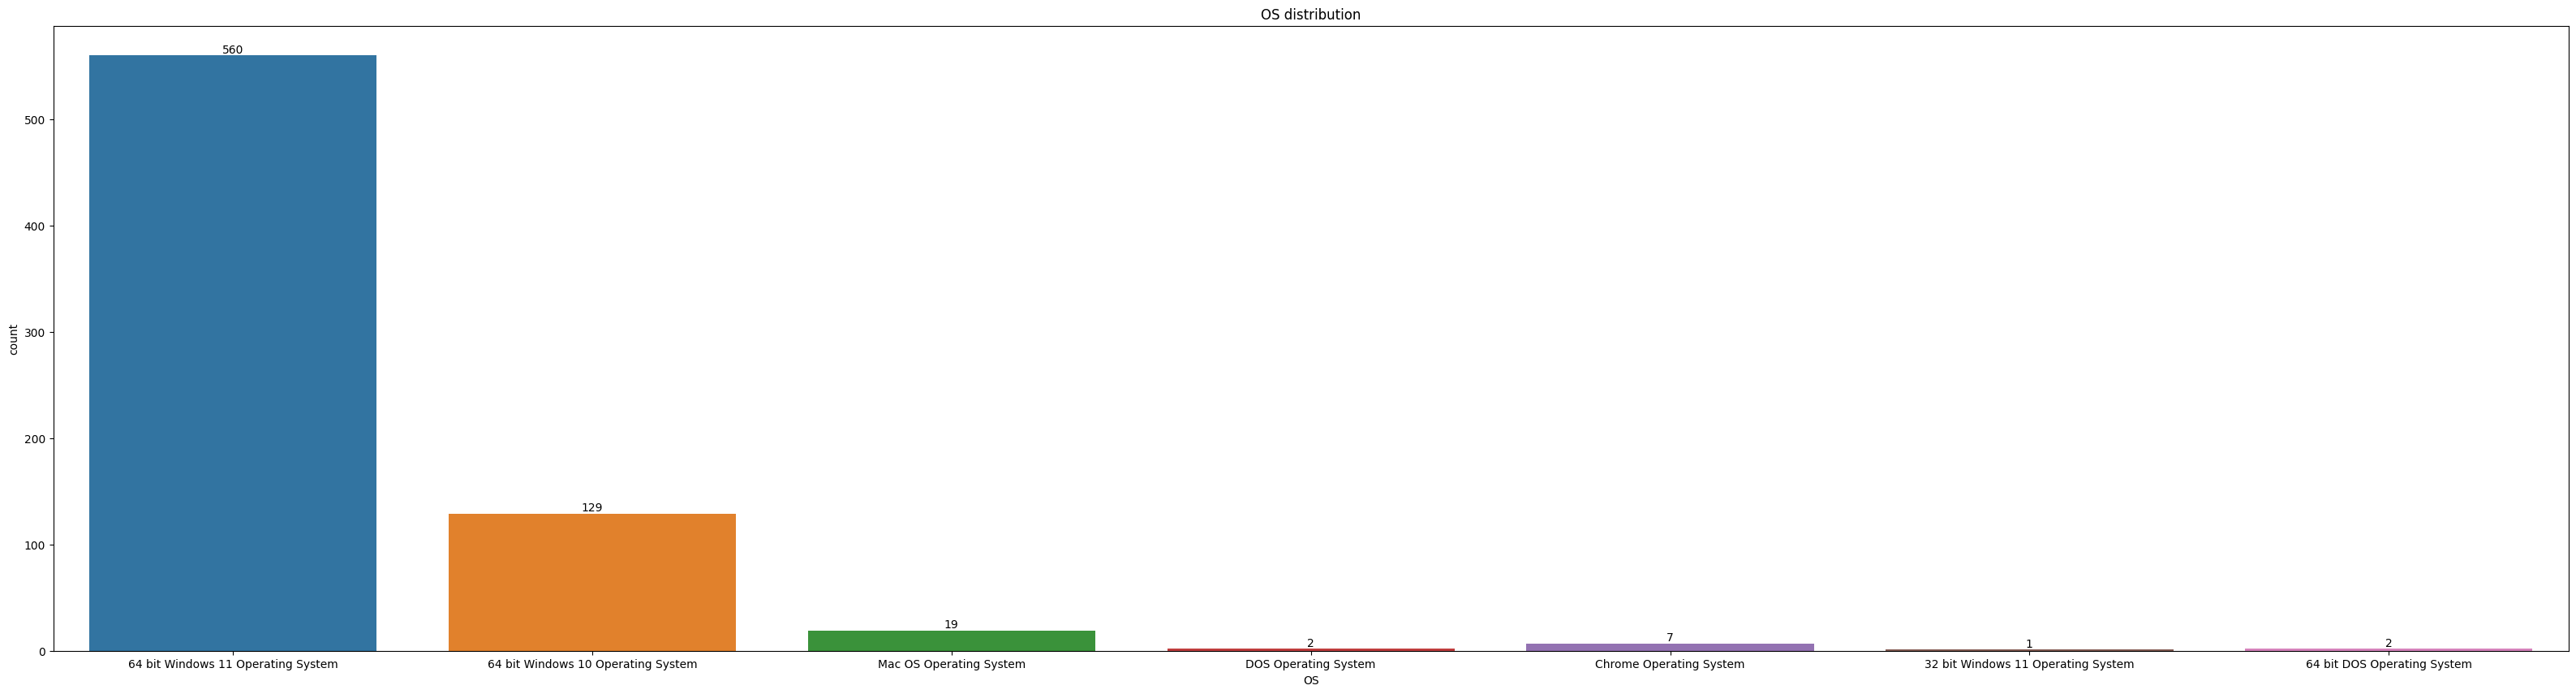

In [234]:
plt.figure(figsize=(40,10))
ax = sns.countplot(data=df, x='OS')
plt.xlabel('OS')
plt.title('OS distribution')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
plt.show()

***OS Vs MRP (Bivariate)***

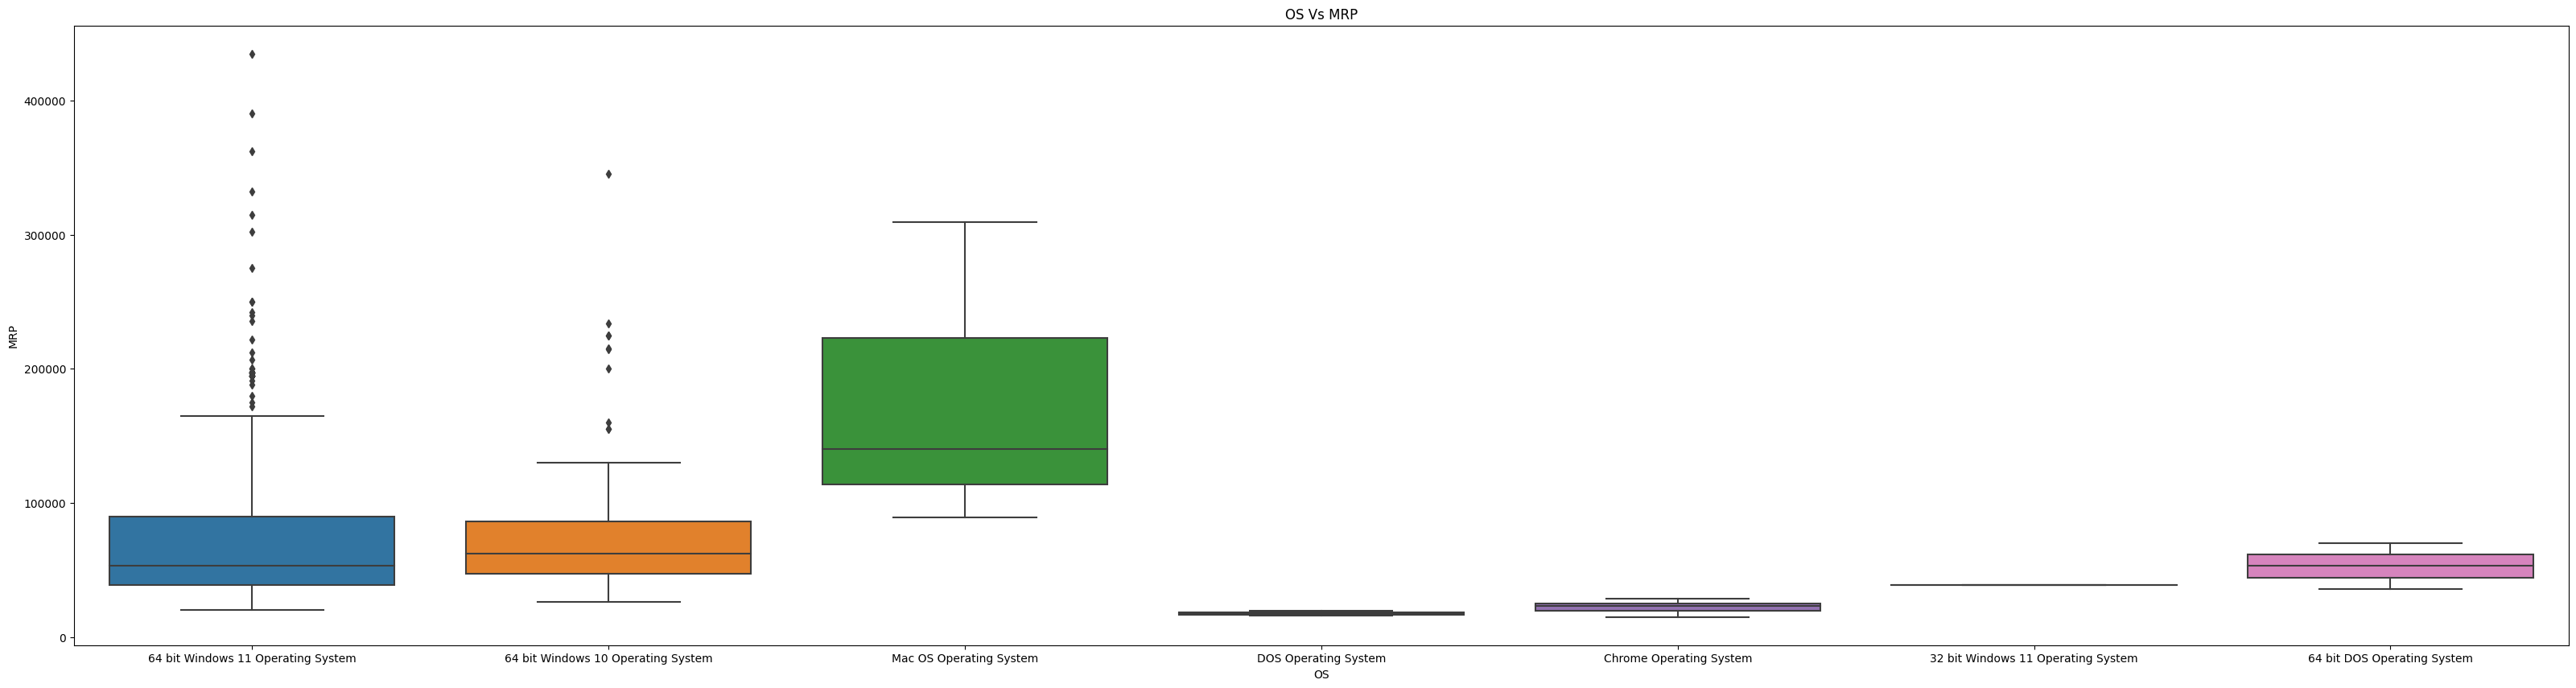

In [235]:
plt.figure(figsize=(40,10))
sns.boxplot(y=df['MRP'],x=df['OS'],data=df) 
plt.xlabel('OS')
plt.ylabel('MRP')
plt.title('OS Vs MRP')
plt.show()

In [236]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display,Touchscreen,SSD,HDD,EMMC,Display_size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,14 inch,No,256,0,0,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,15.6 inch,No,512,0,0,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,ASUS,15.6 inch,No,512,0,0,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,512 GB SSD,HP,15.6 inch,No,512,0,0,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,ASUS,15.6 inch,No,512,0,0,15.6


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       720 non-null    object 
 1   Rating        581 non-null    float64
 2   MRP           720 non-null    float64
 3   Feature       720 non-null    object 
 4   Processor     720 non-null    object 
 5   RAM           720 non-null    int64  
 6   OS            720 non-null    object 
 7   Storage       720 non-null    object 
 8   Brand         720 non-null    object 
 9   Display       720 non-null    object 
 10  Touchscreen   720 non-null    object 
 11  SSD           720 non-null    int64  
 12  HDD           720 non-null    int64  
 13  EMMC          720 non-null    int64  
 14  Display_size  720 non-null    float64
dtypes: float64(3), int64(4), object(8)
memory usage: 84.5+ KB


In [238]:
df.describe()

,Rating,MRP,RAM,SSD,HDD,EMMC,Display_size
count,581.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,4.321170,81605.837500,11.283333,577.844444,65.633333,1.022222,15.183000
std,0.282872,61552.955102,5.201663,313.667202,247.277153,9.264439,0.891272
min,3.000000,14990.000000,4.000000,0.000000,0.000000,0.000000,11.600000
25%,4.200000,38996.750000,8.000000,512.000000,0.000000,0.000000,14.175000
50%,4.300000,59990.000000,8.000000,512.000000,0.000000,0.000000,15.600000
75%,4.500000,95240.000000,16.000000,1000.000000,0.000000,0.000000,15.600000
max,5.000000,434830.000000,32.000000,2000.000000,1000.000000,128.000000,17.300000


## ***5. Feature Engineering & Data Pre-processing***

In [239]:
data = df.copy()

### Unwanted Features

In [240]:
#Removing Unwanted Features
data = data.drop(['Product','Rating','Feature','Brand','Storage','Display'], axis =1)
data.head()

,MRP,Processor,RAM,OS,Touchscreen,SSD,HDD,EMMC,Display_size
0,36990.0,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,No,256,0,0,14.0
1,39990.0,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,No,512,0,0,15.6
2,32990.0,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,No,512,0,0,15.6
3,49990.0,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,No,512,0,0,15.6
4,49990.0,Intel Core i5 Processor,8,64 bit Windows 11 Operating System,No,512,0,0,15.6


1. I removed Product and Feature variable as it contains the information in textual format which we already extracted out in different variables.
2. I removed Rating as it will come after the purchansing on laptop and hence it will not affect the price of the product.
3. I removed the brand as we have to predict the price based on the feature of the laptop to enter the market accordinglt.

In [241]:
data['Touchscreen'] = data['Touchscreen'].map({'Yes':1,'No':0})

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MRP           720 non-null    float64
 1   Processor     720 non-null    object 
 2   RAM           720 non-null    int64  
 3   OS            720 non-null    object 
 4   Touchscreen   720 non-null    int64  
 5   SSD           720 non-null    int64  
 6   HDD           720 non-null    int64  
 7   EMMC          720 non-null    int64  
 8   Display_size  720 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 50.8+ KB


Correlation

<Axes: title={'center': 'Correlation Analysis'}>

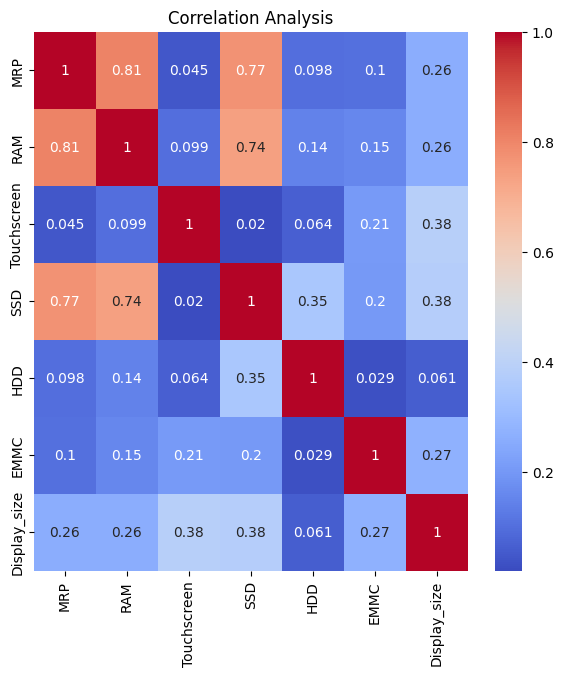

In [243]:
plt.figure(figsize=(7,7))
plt.title('Correlation Analysis')
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

###  Data Transformation

In [244]:
dataset = data.copy()

<ipython-input-245-2ee62e1a8f82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MRP'])


<Axes: xlabel='MRP', ylabel='Density'>

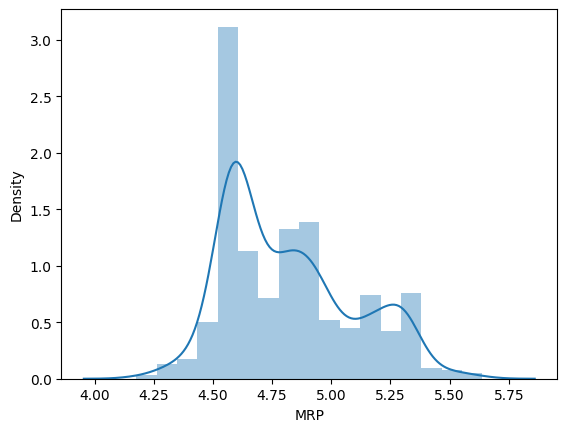

In [245]:
dataset['MRP']= np.log10(dataset['MRP'])
sns.distplot(dataset['MRP'])

In [246]:
dataset['MRP'].describe()

count    720.000000
mean       4.816344
std        0.275053
min        4.175802
25%        4.591028
50%        4.778079
75%        4.978815
max        5.638319
Name: MRP, dtype: float64

In [247]:
dataset.head()

,MRP,Processor,RAM,OS,Touchscreen,SSD,HDD,EMMC,Display_size
0,4.568084,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,0,256,0,0,14.0
1,4.601951,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,0,512,0,0,15.6
2,4.518382,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,0,512,0,0,15.6
3,4.698883,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,0,512,0,0,15.6
4,4.698883,Intel Core i5 Processor,8,64 bit Windows 11 Operating System,0,512,0,0,15.6


### Data Splitting

In [248]:
X = dataset.drop(columns=['MRP'])
y = dataset['MRP']

In [249]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [250]:
X

,Processor,RAM,OS,Touchscreen,SSD,HDD,EMMC,Display_size
0,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,0,256,0,0,14.0
1,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,0,512,0,0,15.6
2,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,0,512,0,0,15.6
3,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,0,512,0,0,15.6
4,Intel Core i5 Processor,8,64 bit Windows 11 Operating System,0,512,0,0,15.6
...,...,...,...,...,...,...,...,...
715,Intel Other Processor,4,Chrome Operating System,1,0,0,64,11.6
716,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 11 Operating System,0,512,0,0,15.6
717,AMD Ryzen 9 Octa Core Processor,16,64 bit Windows 11 Operating System,0,1000,0,0,15.6
718,Intel Core i7 Processor,16,64 bit Windows 11 Operating System,1,512,0,0,14.0


In [251]:
y

0      4.568084
1      4.601951
2      4.518382
3      4.698883
4      4.698883
         ...   
715    4.370883
716    4.866228
717    5.290012
718    5.100336
719    4.707485
Name: MRP, Length: 720, dtype: float64

### ***6. ML Model Implementation***

###***Linear Regression***

In [252]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,2])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9250740122087946
MAE 0.05848306939888645


***Lasso Regression***



In [253]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,2])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9035522576940119
MAE 0.06823167092437189


***Ridge Regression***

In [254]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,2])
],remainder='passthrough')

step2 = Ridge(alpha=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9246692833219449
MAE 0.05857874442419528


***KNN***

In [255]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,2])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.888337795745015
MAE 0.06483478771120177


***Decision Tree***

In [256]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,2])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8767838537172141
MAE 0.06892220963272074


***SVM***

In [257]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,2])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8921086821434947
MAE 0.073359044101377


***Random Forest***

In [258]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,2])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9084073169237235
MAE 0.06058572410280373


Exporting the Model

In [259]:
import pickle

dataset['MRP'] = (np.exp(dataset['MRP']))
dataset.to_csv(r'Processed_laptop_dataset.csv')
pickle.dump(dataset,open('dataset.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

# **Conclusion**

Linear Regression  and lasso gives the best R2 Score followed by Random Forest

R2 score 0.9250740122087961

MAE 0.05848306939888475